# Exploratory Data Analysis on Car Purchase Dataset and Using ML Algorithms to predict car sales

#### Contributed by:
* Suddhasil Chatterjee (github: https://github.com/SuddhasilC)

## Exploratory Data Analysis 

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the dataset

In [2]:
data=pd.read_csv('Car Purchase Dataset/car_data.csv')

### Exploring the data

In [3]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


#### Observation:
* Age: Minimum: 18 and Maximum: 63
* Annual Salary: Minimum: 15000 and Maximum: 152500

In [6]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

#### There are no null value in our dataset

#### Since User ID plays no role in customer's purchase decision, we drop it. 

In [7]:
data.drop('User ID',axis=1,inplace=True)

In [8]:
data.head()

,Gender,Age,AnnualSalary,Purchased
0,Male,35,20000,0
1,Male,40,43500,0
2,Male,49,74000,0
3,Male,40,107500,1
4,Male,25,79000,0


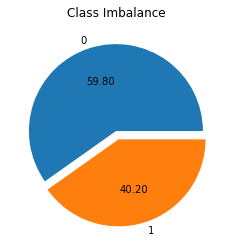

In [9]:
plt.pie(data['Purchased'].value_counts(),labels=data['Purchased'].value_counts().index,autopct='%.2f',explode=[0,0.1])
plt.title("Class Imbalance")
plt.show()

#### A slight imbalance in between the classes is observed. Samples where Car was not purchases is higher in number.

<AxesSubplot:xlabel='AnnualSalary', ylabel='Count'>

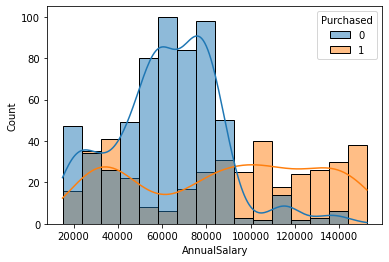

In [10]:
sns.histplot(data,x='AnnualSalary',hue='Purchased',kde=True)

#### Observations:
* People tend to buy car regardless of their annual salary. 
* Although people in the range 45k-85k tend not to purchase the car.

<AxesSubplot:xlabel='Age', ylabel='Count'>

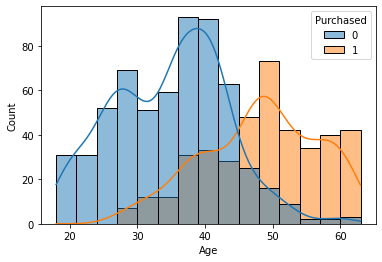

In [11]:
sns.histplot(data,x='Age',hue='Purchased',kde=True)

#### Observations:
* Normally Distributed.
* People of age >45 usually tend to purchase the car.  

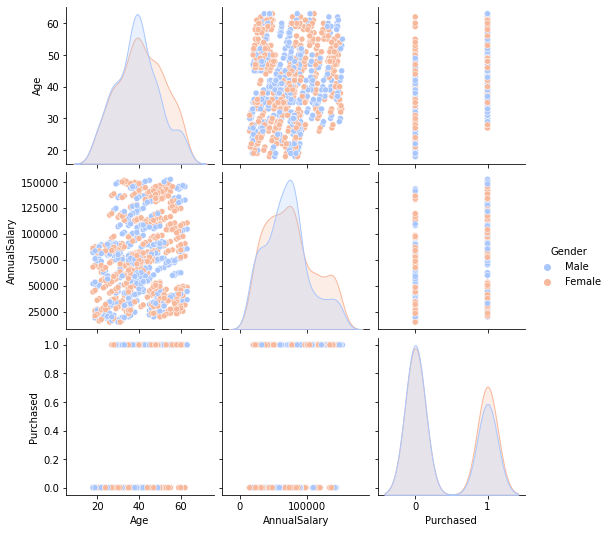

In [12]:
sns.pairplot(data,hue='Gender',palette='coolwarm')

#### Observations:
* Both the Age and AnnualSalary have same properties irrespective of Gender

<AxesSubplot:>

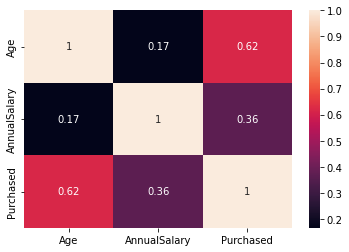

In [13]:
sns.heatmap(data.corr(),annot=True)

#### Observations: 
* Positive Correaltion is seen between Age and Purchased as observed from the graphs.

## Data Preprocessing

### One Hot Encoding the Gender Column

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [15]:
enc = OneHotEncoder(sparse=False)
color_onehot = enc.fit_transform(data[['Gender']])
x=pd.DataFrame(color_onehot, columns=list(enc.categories_[0]))
for i in x.columns:
    data[i]=x[i]
del data['Gender']

In [16]:
data.head()

,Age,AnnualSalary,Purchased,Female,Male
0,35,20000,0,0.0,1.0
1,40,43500,0,0.0,1.0
2,49,74000,0,0.0,1.0
3,40,107500,1,0.0,1.0
4,25,79000,0,0.0,1.0


### Spliting dataset into training and test data

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Purchased'],axis=1),data['Purchased'],random_state=42,shuffle=True,test_size=0.15)

### OverSampling of Minority Class using SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
X_test,y_test = sm.fit_resample(X_test,y_test)

## Predicting Car Purchase using Machine Learning Algorithms

### Importing libraries

In [19]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [20]:
accuracy=[]
mod=['K Nearest Neighbours','Support Vector Classifier','Logistic Regression','Kernel SVM','Naive Bayes Classifier','Decision Tree Classifier','Random Forest Classifier','XGBoost']

### K Nearest Neighbours

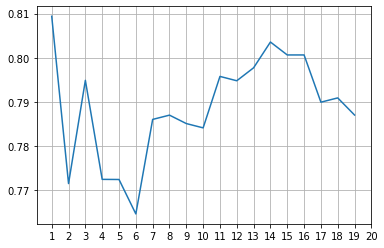

In [21]:
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        84
           1       0.84      0.77      0.81        84

    accuracy                           0.82       168
   macro avg       0.82      0.82      0.82       168
weighted avg       0.82      0.82      0.82       168



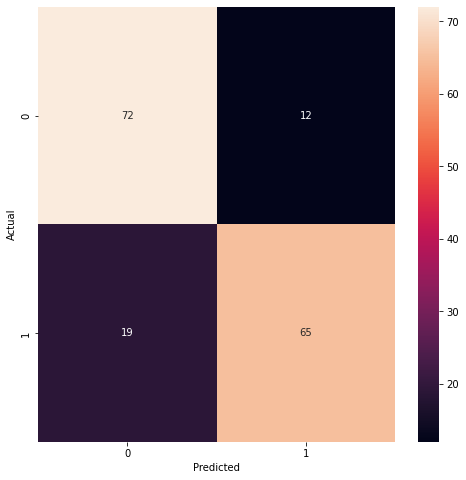

In [22]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))
accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

### Support Vector Classifier

#### Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [25]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78        84
           1       0.78      0.79      0.78        84

    accuracy                           0.78       168
   macro avg       0.78      0.78      0.78       168
weighted avg       0.78      0.78      0.78       168



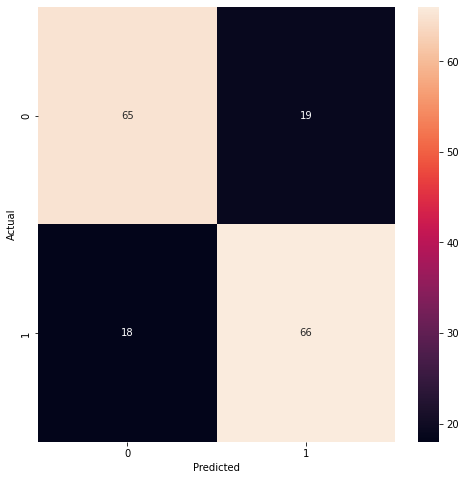

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Logistic Regression

In [27]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        84
           1       0.80      0.77      0.79        84

    accuracy                           0.79       168
   macro avg       0.79      0.79      0.79       168
weighted avg       0.79      0.79      0.79       168



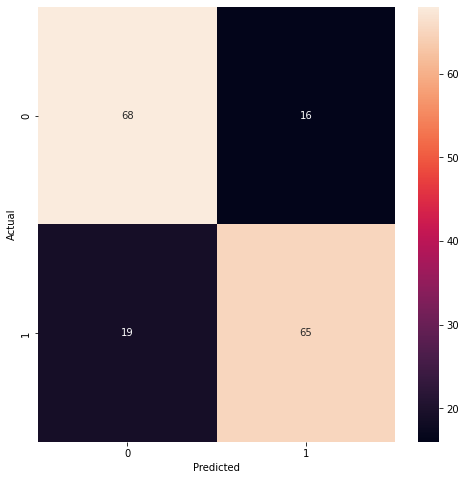

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Kernel SVM

In [30]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [31]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        84
           1       0.92      0.92      0.92        84

    accuracy                           0.92       168
   macro avg       0.92      0.92      0.92       168
weighted avg       0.92      0.92      0.92       168



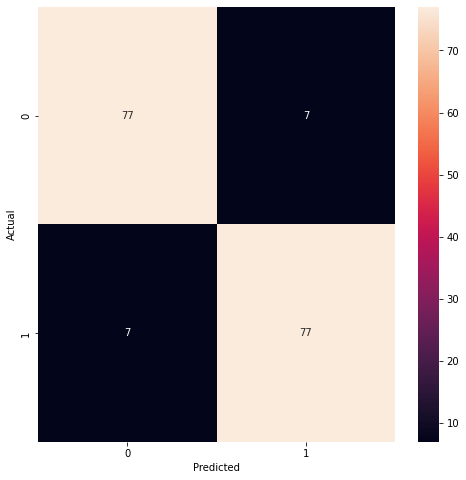

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Naive Bayes Classifier

In [33]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        84
           1       0.86      0.88      0.87        84

    accuracy                           0.87       168
   macro avg       0.87      0.87      0.87       168
weighted avg       0.87      0.87      0.87       168



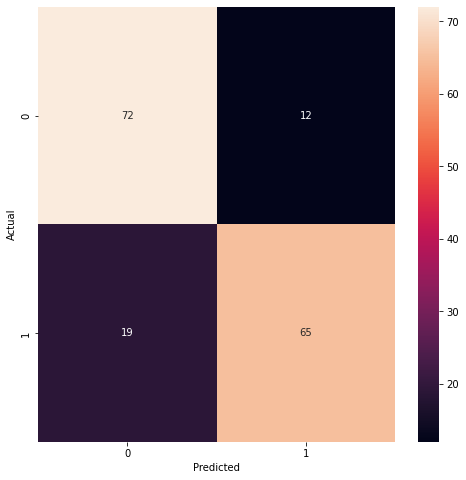

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Decision Tree Classifier

In [36]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        84
           1       0.89      0.93      0.91        84

    accuracy                           0.90       168
   macro avg       0.91      0.90      0.90       168
weighted avg       0.91      0.90      0.90       168



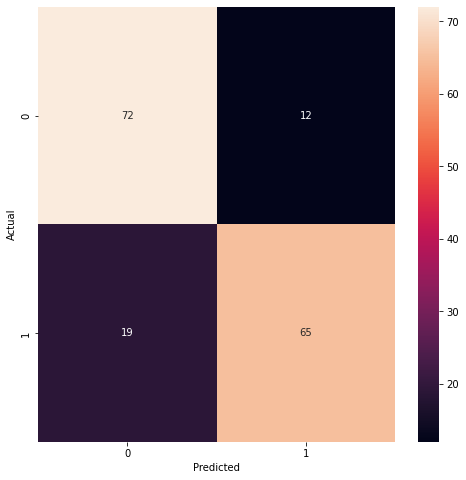

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Random Forest Classifier

/home/csuddhasil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/csuddhasil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/csuddhasil/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        84
           1       0.93      0.88      0.90        84

    accuracy                           0.90       168
   macro avg       0.91      0.90      0.90       168
weighted avg       0.91      0.90      0.90       168



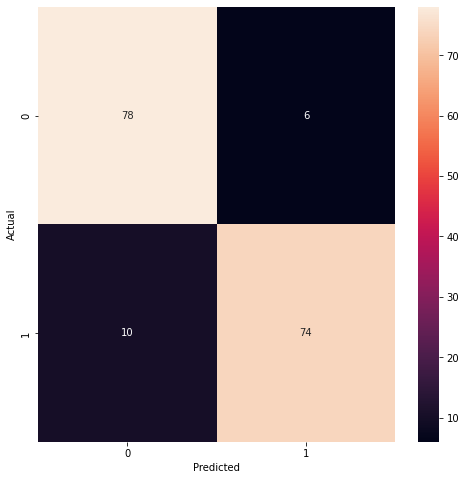

In [39]:
param_grid = {
    'n_estimators': [50, 75,100, 150, 200,300],
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,16],
    'criterion' :['gini', 'entropy']
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
accuracy.append(accuracy_score(y_test, y_pred_rcv))

### XGBoost

In [40]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        84
           1       0.90      0.88      0.89        84

    accuracy                           0.89       168
   macro avg       0.89      0.89      0.89       168
weighted avg       0.89      0.89      0.89       168



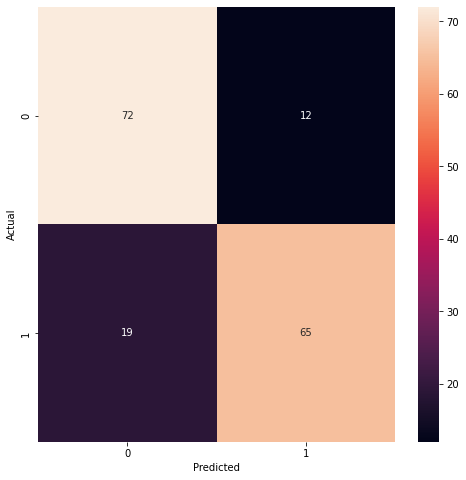

In [41]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,classifier.predict(X_test)))
accuracy.append(accuracy_score(y_test, y_pred))

### Summary

<AxesSubplot:>

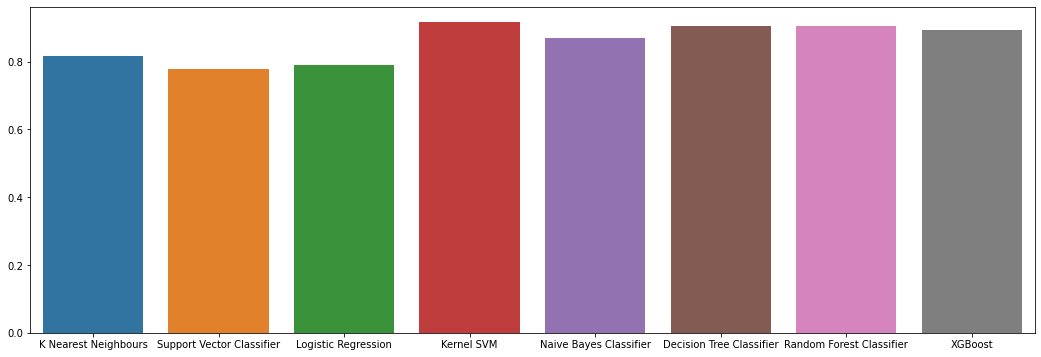

In [42]:
plt.figure(figsize=(18,6))
sns.barplot(x=mod,y=accuracy)

### Conclusion: Best Results were observed using Kernel SVM